# Support Vector Machines 
## Guided example and challenge

Using the [Epicurious Recipes dataset](https://www.kaggle.com/hugodarwood/epirecipes) 

__Goal__: Predict a recipe's rating from ingredient and keyword list

In [17]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
raw_data = pd.read_csv("epi_r.csv")

In [25]:
#list(raw_data.columns)


In [21]:
raw_data.shape

(20052, 680)

In [18]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Target variable is rating
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

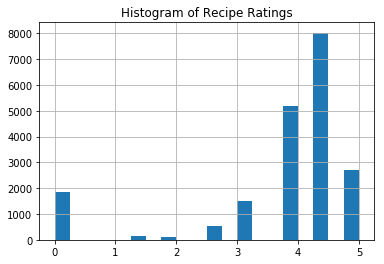

In [12]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [13]:
# Counting nulls
null_count = raw_data.isnull().sum()
null_count[null_count > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [159]:
from sklearn.svm import SVR #importing SVM Regressor
svr = SVR()

#feature set:
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)

#target:
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

/Users/pbhag/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Let's see what a scatter plot looks like, comparing actuals to predicted.

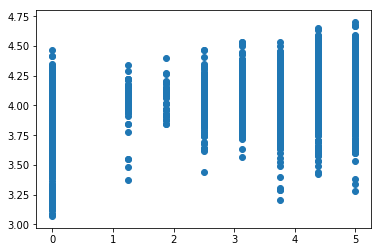

In [15]:
plt.scatter(Y, svr.predict(X))
plt.show()

Now that is a pretty useless visualization. This is because of the discontinuous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't

In [160]:
svr.score(X, Y)

0.26884408577365915

In [161]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/Users/pbhag/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pbhag/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pbhag/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pbhag/Library/Python/3.7/lib/p

array([0.26330566, 0.25816523, 0.26266863, 0.25727706, 0.267485  ])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here.

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

And that is your challenge.

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

## Challenge attempt:

First, making this a binary classification problem. Instead of predicting a continuous rating, we can decide if a recipe is "good" or "bad". We saw that the ratings are not normally distributed, with a mean rating of 3.71 and median rating of 4.375. 

Let's split the rating variable so that: 
- "good" rating: _rating >= 4, classified as 1_
- "bad" rating: _rating < 4, classified as 0_


In [17]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

%matplotlib inline

In [18]:
# Create a new df of the data to play with. 
# initialize it by dropping the features with several missing values:
df = pd.read_csv('epi_r.csv')
df = df.drop(['calories', 'protein', 'fat', 'sodium'], 1)
df = df.dropna()


In [47]:
df.head()

,title,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Transform rating variable to binary: 

df.rating = df.rating.apply(lambda x: 1 if x >= 4 else 0)
df.rating.value_counts()

1    10738
0     9314
Name: rating, dtype: int64

### Feature selection, first attempt:

See how selecting the 30 most commonly mentioned ingredients/keywords/phrases work as features:

In [20]:
features1 = df.drop(['rating', 'title'], 1) #
features1 = features1.apply(pd.Series.value_counts).transpose()
features1 = features1.reset_index()
features1.columns = ['keyword', 'not mentioned', 'mentioned'] 
features1 = features1.sort_values(by='mentioned', ascending=False)
features1 = features1.head(30)

# Put the top keywords into a list: 
features1_list = list(features1.keyword)
features1_list

['bon appétit',
 'peanut free',
 'soy free',
 'tree nut free',
 'vegetarian',
 'gourmet',
 'kosher',
 'pescatarian',
 'quick & easy',
 'wheat/gluten-free',
 'bake',
 'summer',
 'dessert',
 'dairy free',
 'side',
 'no sugar added',
 'winter',
 'fall',
 'dinner',
 'sugar conscious',
 'healthy',
 'kidney friendly',
 'onion',
 'tomato',
 'vegetable',
 'sauté',
 'milk/cream',
 'fruit',
 'vegan',
 'kid-friendly']

These are the most commonly mentioned ingredients/keywords/phrases for the recipes in our dataset. Lets use them as our features in our SVC model:

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
svc = SVC()
X1 = df[features1_list]
Y1 = df.rating


#uncomment below to run svm (might take a while)
start_time = time.perf_counter()
svc.fit(X1,Y1)
scores_svc = cross_val_score(svc,X1,Y1,cv=KFold(5, shuffle=True))

print('score array:\n', scores_svc)
print('\nscore array mean:\n', np.mean(scores_svc))
print('\nscore array std dev:\n', np.std(scores_svc))
print('\nruntime:\n',time.perf_counter() - start_time, "seconds")



score array:
 [0.56544503 0.56619297 0.57306733 0.56359102 0.57630923]

score array mean:
 0.5689211153119444

score array std dev:
 0.004893080206561349

runtime:
 105.51647454500016 seconds


Not a great score..

In [22]:

#try other c values and kernels
from sklearn.model_selection import GridSearchCV

params = [{'C': [0.01, 0.1, 1, 10], 'kernel':['linear']},
          {'C': [0.01, 0.1, 1, 10], 'kernel':['poly']},
          {'C': [0.01, 0.1, 1, 10], 'kernel':['rbf']},
          {'C': [0.01, 0.1, 1, 10], 'kernel':['sigmoid']}]

grid = GridSearchCV(estimator=svc, param_grid=params)

#uncomment below to run svm (might take a while)
start_time = time.perf_counter()
grid.fit(X1,Y1)
print('\nBest parameters:\n', grid.best_params_)
print('\nBest score:\n', grid.best_score_)
print('\nruntime:\n',time.perf_counter() - start_time, "seconds")


Best parameters:
 {'C': 10, 'kernel': 'rbf'}

Best score:
 0.5765010971474167

runtime:
 606.1941586580001 seconds


Looks the scores arent much better regardless of trying out different parameters for the C-value and kernel type.


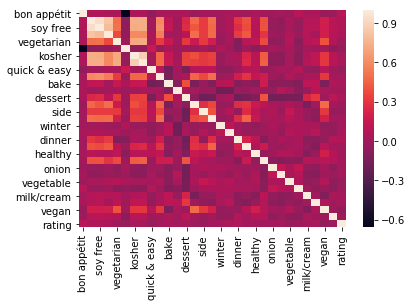

In [56]:
# taking a look at our feature set to see any collinearities: 
df2 = pd.concat([X1, Y1], 1)
sns.heatmap(df2.corr())

In [23]:
#best result was from default rbf kernel with c=10
svc1 = SVC(C=10)

#uncomment below to run svm (might take a while)
start_time = time.perf_counter()
svc1.fit(X1,Y1)
scores_svc1 = cross_val_score(svc1,X1,Y1,cv=5)

print('score array:\n', scores_svc1)
print('\nscore array mean:\n', np.mean(scores_svc1))
print('\nscore array std dev:\n', np.std(scores_svc1))
print('\nruntime:\n',time.perf_counter() - start_time, "seconds")

score array:
 [0.58040389 0.57068063 0.57117926 0.58354115 0.57420803]

score array mean:
 0.5760025907360253

score array std dev:
 0.005118779841322413

runtime:
 109.8590287699999 seconds


## Feature selection, round 2:

Using SKLearn's **SelectKBest** module, lets see if we can find a better featureset:

(using f_classif to select the best features:)

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif #using f_classif to select the best features:
import warnings
warnings.filterwarnings('ignore')

#data & target
X2 = df.drop(['title','rating'],1)
Y2 = df.rating

#use f val for kbest, fit SVC
# f_classif: Used only for categorical targets and based on the
# Analysis of Variance (ANOVA) statistical test.


f_vals = SelectKBest(f_classif, k=30)
svc2 = SVC()
svc2_f = make_pipeline(f_vals, svc2)

#uncomment below to run svm (might take a while)
start_time = time.clock()
svc2_f.fit(X2,Y2)
scores_svc2 = cross_val_score(svc2_f,X2,Y2,cv=5)

print('score array:\n', scores_svc2)
print('\nscore array mean:\n', np.mean(scores_svc2))
print('\nscore array std dev:\n', np.std(scores_svc2))
print('\nruntime:\n',time.clock() - start_time, "seconds")

score array:
 [0.56270257 0.56818748 0.57043131 0.56708229 0.57246196]

score array mean:
 0.5681731242191693

score array std dev:
 0.0033048643000487803

runtime:
 104.50788000000011 seconds


Using SelectKBest to find the 30 best features, this time using Chi^2 to determine the best features:

In [58]:
X3 = df.drop(['title','rating'],1)
Y3 = df.rating
from sklearn.feature_selection import chi2
# Apply SelectKBest class to extract the top 30 best features
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(X3, Y3)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X3.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs       Score
277  house & garden  168.736737
186           drink  130.854678
8         alcoholic  114.406372
57      bon appétit  100.806123
235             gin  100.128167
520           roast   87.120913
616    thanksgiving   83.703405
134  cocktail party   76.283693
179          dinner   67.082465
580          spirit   64.501838


In [33]:
features2 = featureScores.sort_values(by='Score', ascending=False)
features2 = features2.head(30)

# Put the top keywords into a list: 
features2_list = list(features2.Specs)
features2_list


['house & garden',
 'drink',
 'alcoholic',
 'bon appétit',
 'gin',
 'roast',
 'thanksgiving',
 'cocktail party',
 'dinner',
 'spirit',
 'christmas',
 'bitters',
 'soy free',
 'peanut free',
 'grill/barbecue',
 'low fat',
 'backyard bbq',
 'cocktail',
 'fall',
 'grill',
 'stuffing/dressing',
 'harpercollins',
 'pasta',
 'rum',
 'goat cheese',
 'tree nut free',
 'stir-fry',
 'vegan',
 "father's day",
 'meat']

Running the model again with new set of SelectKBest Features (selected with chi2)

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
svc = SVC()
X4 = df[features2_list]
Y4 = df.rating


#uncomment below to run svm (might take a while)
start_time = time.perf_counter()
svc.fit(X4,Y4)
scores_svc = cross_val_score(svc,X4,Y4,cv=KFold(5, shuffle=True))

print('score array:\n', scores_svc)
print('\nscore array mean:\n', np.mean(scores_svc))
print('\nscore array std dev:\n', np.std(scores_svc))
print('\nruntime:\n',time.perf_counter() - start_time, "seconds")


score array:
 [0.56394914 0.56968337 0.58478803 0.58179551 0.56134663]

score array mean:
 0.5723125370318904

score array std dev:
 0.009409300634247447

runtime:
 101.84023616200011 seconds


This doesnt perform any better than the first set of features we created.

In [35]:
#try other c values and kernels
from sklearn.model_selection import GridSearchCV

params = [{'C': [0.01, 0.1, 1, 10], 'kernel':['linear']},
          {'C': [0.01, 0.1, 1, 10], 'kernel':['poly']},
          {'C': [0.01, 0.1, 1, 10], 'kernel':['rbf']},
          {'C': [0.01, 0.1, 1, 10], 'kernel':['sigmoid']}]

grid = GridSearchCV(estimator=svc, param_grid=params)

#uncomment below to run svm (might take a while)
start_time = time.perf_counter()
grid.fit(X4,Y4)
print('\nBest parameters:\n', grid.best_params_)
print('\nBest score:\n', grid.best_score_)
print('\nruntime:\n',time.perf_counter() - start_time, "seconds")


Best parameters:
 {'C': 10, 'kernel': 'rbf'}

Best score:
 0.5763016157989228

runtime:
 619.3142212039998 seconds


## Using PCA to condense our feature set and to create a better model: 

In [49]:
# Revisiting the first feature set we created:
X1.head()

,bon appétit,peanut free,soy free,tree nut free,vegetarian,gourmet,kosher,pescatarian,quick & easy,wheat/gluten-free,...,healthy,kidney friendly,onion,tomato,vegetable,sauté,milk/cream,fruit,vegan,kid-friendly
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [59]:
from sklearn.decomposition import PCA

pca = PCA(3) #creating 3 pca variables 
pca.fit(X1) # from our first feature set (top 30 keywords)
X1_trans = pca.transform(X1) # X1_trans is 3 variables, a dimensionality reduction of our 30 variable feature set, X1



svc = SVC()

#svc.fit(X1_trans, Y)

scores = cross_val_score(svc, X1_trans, Y1, cv=KFold(5, shuffle=True) )


print(scores.mean())
print(scores.std())


0.560842533407195
0.008822942008584479


In [60]:
# What if we PCA'd the the whole dataset? like every single variable condensed into 3 PCA features? here we try:
pca = PCA(3)
X5 = df.drop(['rating', 'title'], 1) # the whole dataset, minus rating and title, so every single feature:
pca.fit(X5) # PCA fitting all the features
X2_trans = pca.transform(X5) # X2_trans is 3 features that represents every feature


svc = SVC()

scores2 = cross_val_score(svc, X2_trans, Y1, cv=KFold(5, shuffle=True))

print(scores2.mean())
print(scores2.std())

0.5624376978272345
0.00301718924172598


In [61]:
# Just out of curiosity, checking if all the features fitted 
# to the data (without PCA) performs better than using PCA at all:

## DO NOT RUN THIS CELL AGAIN AS IT TAKES EXTREMELY LONG TO RUN ####

## COMMENTING THIS OUT SO THAT IT WONT BE RUN ACCIDENTALLY IN THE FUTURE 

# X5 = df.drop(['rating', 'title'], 1) # the whole dataset, minus rating and title, so every single feature:

# svc = SVC()

# scores2 = cross_val_score(svc, X5, Y1, cv=KFold(5, shuffle=True))

# print(scores2.mean())
# print(scores2.std())

0.572960020790706
0.017667626613265066


hardly a difference between every single feature used vs every single feature transformed into 3 PCA variables. 

This dataset honestly just looks like a bad dataset to do a classification on our target, 'rating'. Even using every single variable results in a low score and pretty much has no differentiation between using the top 30 features, selecting the best features with SelectKBest *(using both f_classif and chi2 methods)* PCA for dimensionality reduction was just to see if there would be a different result, but there wasnt. 

Lets try a different model, like RFC to check if SVM is the problem here. Running RFC to see if we can get better results:

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#using PCA variable of our first feature set (top 30)
print(scores3.mean())
scores3 = cross_val_score(rfc, X1_trans, Y1, cv=KFold(5, shuffle=True)) 
print(scores3.std())

0.562537361408247
0.0023069061948385924


In [50]:
rfc = RandomForestClassifier()
# Using PCA variable of all the features in the dataset
scores3 = cross_val_score(rfc, X2_trans, Y1, cv=KFold(5, shuffle=True)) 
print(scores3.mean())
print(scores3.std())

0.5892676187864918
0.008206705725777887


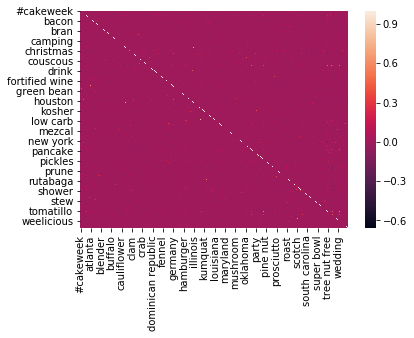

In [55]:
df3 = pd.concat([X5, Y1], 1)
sns.heatmap(df3.corr())

In [54]:
abs(df3.corr().loc[:,'rating']).sort_values(ascending=False)

rating               1.000000
bon appétit          0.097076
house & garden       0.092801
drink                0.083065
alcoholic            0.077158
gin                  0.071066
roast                0.068198
thanksgiving         0.067094
peanut free          0.065897
soy free             0.065799
cocktail party       0.063534
dinner               0.062186
spirit               0.057028
christmas            0.054409
bitters              0.052951
grill/barbecue       0.051204
low fat              0.049230
tree nut free        0.047943
backyard bbq         0.047682
fall                 0.046565
cocktail             0.045829
pasta                0.043092
grill                0.042924
stuffing/dressing    0.042454
harpercollins        0.042345
rum                  0.041792
goat cheese          0.041207
vegan                0.039458
stir-fry             0.038336
father's day         0.036564
meat                 0.035801
Name: rating, dtype: float64

The correlations of our features to our target variable is so awfully low, no wonder we have such bad results. 
Doing all this really just tells me that trying to classify a recipe as "good" or "bad" based on what appears in its ingredient list is not a good method. 